
# PCA with Missing Data
In this example, we're going to use the Wisconsin breast cancer diagnostics dataset, which is included as an example dataset in sci-kit learn.  It consists of 30 morphological features from 569 breast tumour biopsies, along with a label of "malignant" or "benign".

We start by loading in the data and necessary packages.

In [1]:
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
normalized_data = StandardScaler().fit_transform(breast_cancer.data)

There's a reason this is a classic ML demonstration dataset: The features can predict the target using a linear model with near perfect accuracy.  When we do PCA and color the samples by diagnosis, we see an almost perfect seperation with just two principal components.

Text(0, 0.5, 'PC2')

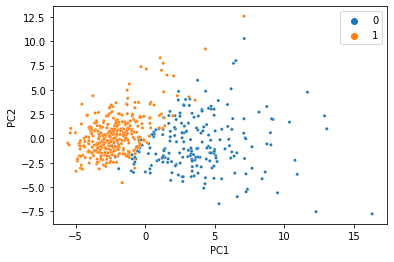

In [2]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
ax=sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

We were able to condense all 30 features into just two PCs, and the information we care about is still there.  That's less than 7% of the size of the original data, so it's not too hard to believe we don't need 100% of the data to get a meaningful low-dimensional representation.  Let's simulate what would happen if 20% of the data was missing, and replaced with NaN.

In [3]:
missing_mask=np.random.rand(*normalized_data.shape)<0.2
missing_data=normalized_data.copy()
missing_data[missing_mask]=np.nan
missing_data[0:5, 0:5]

array([[        nan, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [        nan, -0.35363241,         nan,  1.90870825, -0.82696245],
       [        nan,         nan,         nan,  1.55888363,  0.94221044],
       [-0.76890929,  0.25373211,         nan,         nan,  3.28355348],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928,  0.28037183]])

If you tried giving sklearn's PCA function this new matrix, you'd definitely get an error, so we'll use the MC class in SpaLoR.  We can use it the same way we used PCA:

Text(0, 0.5, 'PC2')

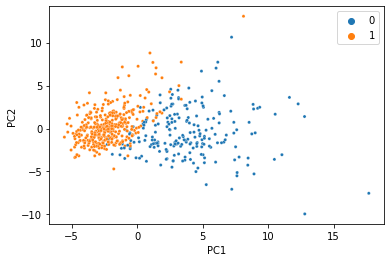

In [4]:
from spalor.models import MC
mc = MC(n_components=2)
pca_missing_data=mc.fit_transform(missing_data)
ax=sns.scatterplot(x=pca_missing_data[:,0], y=pca_missing_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

And voilà, we just did PCA with missing data and got almost the same thing!  This dataset is so clean, we can actually do it with much less data too.  Here's the same thing with 80% of the data missing:

Text(0, 0.5, 'PC2')

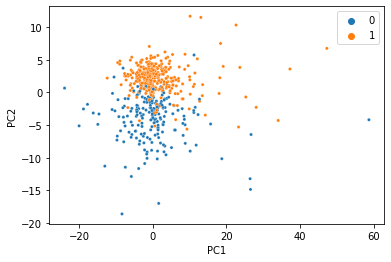

In [5]:
missing_mask = np.random.rand(*normalized_data.shape) <0.8
missing_data = normalized_data.copy()
missing_data[missing_mask] = np.nan
mc = MC(n_components=2)
pca_missing_data=mc.fit_transform(missing_data)
ax=sns.scatterplot(x=pca_missing_data[:,0], y=pca_missing_data[:,1], hue=breast_cancer.target,s=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

At this point, the seperation gets a little messier, but for just 20% of the data it's not bad at all!